# Network Mapping

for the network mapping we used the platform of twitter with two APIs:  
twitter.api   
tweepy   

twitter was used to make the mapping over the network   
tweepy was used to get information about the queries

In [105]:
import twitter
import networkx as nx
import os
import matplotlib.pyplot as plt
%matplotlib inline
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
from datetime import datetime, date, time, timedelta
from collections import Counter
import sys
import pandas as pd

In [106]:
# Clear screen
os.system('cls' if os.name=='nt' else 'clear')
graph2=nx.DiGraph()

# Token

In [107]:
CONSUMER_KEY = 'jliSNchRNEjVtF5grLU2Rlr7h'
CONSUMER_SECRET = '00V1FcuG8vA71RV3cPPw35hxKzUkMSBQGCViGEZDsMlDkmNPTt'
OAUTH_TOKEN = '53727855-loog50PPpIyXwqTHGytojSdh6yzJzkP4J2KaD4o6v'
OAUTH_SECRET = 'qzG19x3WDptitC8GTzV9ew7tTzY7g4ebAwdLMgrQ9N3mT'

# Twitter api

For security was set sleep_on_rate_limit=True   
This due to twitter tend to limit the amount of queries. What this does is to set a delay time until to cntinues gathering the followers when a limit rate has be reached. The limit rate is not constant, it can depend of the traffic.

In [108]:
api = twitter.Api(consumer_key=CONSUMER_KEY,
                      consumer_secret=CONSUMER_SECRET,
                      access_token_key=OAUTH_TOKEN,
                      access_token_secret=OAUTH_SECRET,
                 sleep_on_rate_limit=True)

# Tweepy

In the case of tweepy it was not necessary to set a delay time, because it was used only to discover information about the queries.

In [109]:
auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_SECRET)
auth_api = API(auth)

## Presidential cantidates Mexico 2018

The queries are defined for a list of 4 names of candidates for the presidence of Mexico in 2018

In [7]:
candidates={1:'JoseAMeadeK', 2:'lopezobrador_', 3:'RicardoAnayaC', 4:'JaimeRdzNL'}
for i in candidates:
    print(i,candidates[i])

1 JoseAMeadeK
2 lopezobrador_
3 RicardoAnayaC
4 JaimeRdzNL


## Get information from the accounts

With the use of tweepi we discovered basic information about  the candidates

In [8]:
ids=[]
followersCount=[]
for i in candidates:
    print("\nGetting data for " + candidates[i])
    item = auth_api.get_user(candidates[i])
    print("name: " + item.name)
    print("screen_name: " + item.screen_name)
    print("description: " + item.description)
    print("statuses_count: " + str(item.statuses_count))
    print("friends_count: " + str(item.friends_count))
    print("followers_count: ",item.followers_count)
    print("id: ", item.id)
    ids.append(item.id)
    followersCount.append(item.followers_count)


Getting data for JoseAMeadeK
name: José Antonio Meade🇲🇽
screen_name: JoseAMeadeK
description: Padre de Dionisio, José Ángel y Magdalena. Esposo de Juana. Licenciado en Economía por el ITAM y en Derecho por la UNAM.
statuses_count: 12925
friends_count: 2739
followers_count:  1476723
id:  237372254

Getting data for lopezobrador_
name: Andrés Manuel
screen_name: lopezobrador_
description: Presidente Constitucional de los Estados Unidos Mexicanos
statuses_count: 4686
friends_count: 249
followers_count:  6491721
id:  82119937

Getting data for RicardoAnayaC
name: RicardoAnayaC
screen_name: RicardoAnayaC
description: 
statuses_count: 4313
friends_count: 10159
followers_count:  760265
id:  151968088

Getting data for JaimeRdzNL
name: JAIME RDZ EL BRONCO
screen_name: JaimeRdzNL
description: Me dicen #ElBronco soy gobernador del estado de Nuevo León. Estoy convencido del poder ciudadano y juntos re-evolucionar #México.
statuses_count: 30274
friends_count: 8422
followers_count:  709647
id:  13

In [9]:
for i in candidates:
    print("Id ", ids[i-1], "\tFollowers: ",followersCount[i-1],"\tCandidate ",candidates[i])

Id  237372254 	Followers:  1476723 	Candidate  JoseAMeadeK
Id  82119937 	Followers:  6491721 	Candidate  lopezobrador_
Id  151968088 	Followers:  760265 	Candidate  RicardoAnayaC
Id  1342520820 	Followers:  709647 	Candidate  JaimeRdzNL


# Build the network

 We used the method GetFriendIDs with the IDs of the candidates and a limit of the amount of followers divided by 1000, and the followers were added to the network linked to the candidate,

In [10]:
for i in candidates:
    followers = []
    # Load data
    followers.extend(api.GetFollowerIDs(user_id=ids[i-1], total_count=round((followersCount[i-1])/50000)))
    # Create graph
    for user in followers:
        graph.add_edge(user,candidates[i])
#    nx.write_gexf(graph, candidates[i]+"-personal-network.gexf")

In [13]:
plt.figure(figsize=(100,100))
# Layout
pos=nx.random_layout(graph)
#Drawing in plt using nx
nx.draw_networkx(graph, pos, with_labes=False)
plt.axis('off')
plt.tight_layout()
plt.savefig('network.png')

In [11]:
G = graph.to_undirected()

# Save the graph to Json

In [119]:
import json

from networkx.readwrite import json_graph

data1 = json_graph.node_link_data(Graph)
#H = nx.gn_graph(377)
data2 = json_graph.node_link_data(Graph, {'link': 'links', 'source': 'source', 'target': 'target'})

with open('dataUPYDAY.json', 'w') as fp:
    json.dump(data2, fp)

In [24]:
nodes=[]
for node in G.nodes:
    nodes.append(node)

In [30]:
import json
s1 = json.dumps(data1)
s2 = json.dumps(data2, default={'link': 'edges', 'source': 'from', 'target': 'to'})

In [33]:
print(type(data2))


<class 'dict'>


In [33]:
del data2['directed']
del data2['multigraph']
del data2['graph']


In [34]:
with open('dataUPYDAY.json', 'w') as fp:
    json.dump(data2, fp)

In [27]:
data2

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 430889410},
  {'id': 'JoseAMeadeK'},
  {'id': 1214190043809497089},
  {'id': 113164979},
  {'id': 1083222130945187840},
  {'id': 426367119},
  {'id': 1227608021834043393},
  {'id': 626970918},
  {'id': 714242367033708544},
  {'id': 1713591691},
  {'id': 2178120931},
  {'id': 1224765490209402881},
  {'id': 1213397351366193152},
  {'id': 2946657426},
  {'id': 1213682470668816385},
  {'id': 410344591},
  {'id': 150822607},
  {'id': 43646921},
  {'id': 472319283},
  {'id': 1161090297297641472},
  {'id': 2185310396},
  {'id': 1129344284438728706},
  {'id': 104931627},
  {'id': 86004500},
  {'id': 702703979193446400},
  {'id': 193393107},
  {'id': 1222209360853643266},
  {'id': 1227418262373380097},
  {'id': 121705139},
  {'id': 1190108279596302337},
  {'id': 993288202407628801},
  {'id': 1227673644450668547},
  {'id': 'lopezobrador_'},
  {'id': 1227672176729448453},
  {'id': 1227673375943905280},
  {'id': 122767087873

In [26]:
s2

'{"directed": true, "multigraph": false, "graph": {}, "nodes": [{"id": 0}, {"id": 1}, {"id": 2}, {"id": 3}, {"id": 4}, {"id": 5}, {"id": 6}, {"id": 7}, {"id": 8}, {"id": 9}, {"id": 10}, {"id": 11}, {"id": 12}, {"id": 13}, {"id": 14}, {"id": 15}, {"id": 16}, {"id": 17}, {"id": 18}, {"id": 19}, {"id": 20}, {"id": 21}, {"id": 22}, {"id": 23}, {"id": 24}, {"id": 25}, {"id": 26}, {"id": 27}, {"id": 28}, {"id": 29}, {"id": 30}, {"id": 31}, {"id": 32}, {"id": 33}, {"id": 34}, {"id": 35}, {"id": 36}, {"id": 37}, {"id": 38}, {"id": 39}, {"id": 40}, {"id": 41}, {"id": 42}, {"id": 43}, {"id": 44}, {"id": 45}, {"id": 46}, {"id": 47}, {"id": 48}, {"id": 49}, {"id": 50}, {"id": 51}, {"id": 52}, {"id": 53}, {"id": 54}, {"id": 55}, {"id": 56}, {"id": 57}, {"id": 58}, {"id": 59}, {"id": 60}, {"id": 61}, {"id": 62}, {"id": 63}, {"id": 64}, {"id": 65}, {"id": 66}, {"id": 67}, {"id": 68}, {"id": 69}, {"id": 70}, {"id": 71}, {"id": 72}, {"id": 73}, {"id": 74}, {"id": 75}, {"id": 76}, {"id": 77}, {"id": 78}

## Intersections

In [13]:
AnayaFollowers=list(G.neighbors(candidates[3]))
MeadeFollowers=list(G.neighbors(candidates[2]))
AMlOFollowers=list(G.neighbors(candidates[1]))
BroncoFollowers=list(G.neighbors(candidates[4]))

In [14]:
def intersection(AnayaFollowers,MeadeFollowers,AMlOFollowers,BroncoFollowers): 
    I1 = [value for value in AnayaFollowers if value in MeadeFollowers]
    I2 = [value for value in AnayaFollowers if value in AMlOFollowers]
    I3 = [value for value in AnayaFollowers if value in BroncoFollowers]
    I4 = [value for value in MeadeFollowers if value in AMlOFollowers]
    I5 = [value for value in MeadeFollowers if value in BroncoFollowers]
    I6 = [value for value in AMlOFollowers if value in BroncoFollowers]
    return I1,I2,I3,I4,I5,I6
AnayaMeade,AnayaAMLO,AnayaBronco,MeadeAMLO,MeadeBronco,AMLOBronco=intersection(AnayaFollowers,MeadeFollowers,AMlOFollowers,BroncoFollowers)

print("Intersection AMLO-Anaya:\t", len(AnayaAMLO))
print("Intersection AMLO-Bronco:\t", len(AMLOBronco))
print("Intersection AMLO-Meade:\t", len(MeadeAMLO))
print("Intersection Anaya-Meade:\t", len(AnayaMeade))
print("Intersection Anaya-Bronco:\t", len(AnayaBronco))
print("Intersection Meade-Bronco:\t", len(MeadeBronco))



Intersection AMLO-Anaya:	 22
Intersection AMLO-Bronco:	 5
Intersection AMLO-Meade:	 2
Intersection Anaya-Meade:	 0
Intersection Anaya-Bronco:	 5
Intersection Meade-Bronco:	 0


# Graph information

In [21]:
print(nx.info(graph))

Name: 
Type: DiGraph
Number of nodes: 375
Number of edges: 377
Average in degree:   1.0053
Average out degree:   1.0053


In [29]:
print("The node which has highest degree is " ,max(dict(G.degree()).items(), key = lambda x : x[1]))

The node which has highest degree is  ('lopezobrador_', 629)


Text(0,0.5,'Degree distribution')

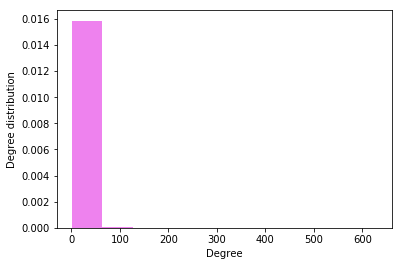

In [22]:
#Plot degree
DictioValues = (dict(nx.degree(G)).values())

values = list(DictioValues)
plt.hist(values, density=True,color = 'violet')
plt.xlabel('Degree')
plt.ylabel('Degree distribution')

In [23]:
print(" Is Lab Graph  strongly connected? \n",nx.is_strongly_connected(graph))
print(" Is Lab Graph  weakly connected? \n",nx.is_weakly_connected(graph))


 Is Lab Graph  strongly connected? 
 False
 Is Lab Graph  weakly connected? 
 True


In [24]:
#Average distance
avg_distance=nx.average_shortest_path_length(G)
print("Average distance: ",avg_distance)
# Diameter
Diameter=nx.diameter(G)
print("Diameter: ",Diameter)

#Radious
Radius=nx.radius(G)
print("Radius: ", Radius)

#Center
Center=nx.center(G)
print("Center: ", Center)

Average distance:  3.2960593903490683
Diameter:  6
Radius:  3
Center:  ['JoseAMeadeK']


In [25]:
import collections
from operator import itemgetter

degree = nx.degree_centrality(G)
SortedDC = sorted(degree.items(), key=itemgetter(1), reverse=True)

print("The most important nodes by degree centrality:")
for i,n in SortedDC[:4]:
    print("Node",i,"\tDegree centrality:%.4f"%n)

The most important nodes by degree centrality:
Node lopezobrador_ 	Degree centrality:0.7036
Node JoseAMeadeK 	Degree centrality:0.1644
Node RicardoAnayaC 	Degree centrality:0.0850
Node JaimeRdzNL 	Degree centrality:0.0794


In [26]:
Ccentrality = nx.closeness_centrality(G)
SortedCC = sorted(Ccentrality.items(), key=itemgetter(1), reverse=True)

print("The most important nodes by Closeness Centrality:")
for n,cc in SortedCC[:5]:
    print("Node",n, "\tCloseness Centrality %.4f"%cc)

The most important nodes by Closeness Centrality:
Node lopezobrador_ 	Closeness Centrality 0.5382
Node 210616158 	Closeness Centrality 0.4417
Node 2161144790 	Closeness Centrality 0.4417
Node 811682517959004162 	Closeness Centrality 0.4417
Node JoseAMeadeK 	Closeness Centrality 0.3748


In [27]:
SortedBC = sorted(nx.betweenness_centrality(G).items(), key=itemgetter(1), reverse=True)

print("The most important nodes by Betweenness Centrality:")
for n,bwc in SortedBC[:5]:
    print("Node",n, "\tBetweenness Centrality %.4f"%bwc)


The most important nodes by Betweenness Centrality:
Node lopezobrador_ 	Betweenness Centrality 0.9104
Node JoseAMeadeK 	Betweenness Centrality 0.4801
Node 210616158 	Betweenness Centrality 0.1388
Node 2161144790 	Betweenness Centrality 0.1388
Node 811682517959004162 	Betweenness Centrality 0.1388


In [28]:
pr = nx.pagerank(G, alpha=0.85)
SortedPR = sorted(pr.items(), key=itemgetter(1), reverse=True)

for n,EC in SortedPR[:5]:
    print("Node",n, "\tPageRank %.4f"%EC)

Node lopezobrador_ 	PageRank 0.3224
Node JoseAMeadeK 	PageRank 0.0687
Node JaimeRdzNL 	PageRank 0.0345
Node RicardoAnayaC 	PageRank 0.0340
Node 1185152769436422144 	PageRank 0.0014


In [110]:
df=pd.read_csv('MarvelUniverse.csv')
df

Real Name  Following                                 Character  \
0      Samuel L. Jackson        869                                 Nick Fury   
1       Robert Downey Jr         62                                Tony Stark   
2           Paul Bettany        619                             vision/jarvis   
3            Tom Holland         98                              Peter Parker   
4            Chris Evans        508                            CaptianAmerica   
5        Chris Hemsworth        109                                      Thor   
6     Scarlett Johansson         17                                  Fan page   
7        Gwyneth Paltrow        189                               Pepper Pots   
8            Don Cheadle        351                               War Machine   
9            Jon Favreau        225                Happy Hogan/Stark's friend   
10        Tom Hiddleston       1330                                      Loki   
11          Mark Ruffalo       1849                                      Hulk   
12        Cobie Smulders        146                                Maria Hill   
13        Anthony Mackie         39                                    Falcon   
14         Jeremy Renner        487                                    Haweye   
15         Dave Bautista        188                                      Drax   
16      Chadwick Boseman        152                              BlackPanther   
17  Benedict Cumberbatch        190                                Dr Strange   
18          Karen Gillan        682                                    Nebula   
19           Clark Gregg       1035                        Agent Phil Coulson   
20            Idris Elba        953                                  Heimdall   
21              Stan Lee        322                             God of Marvel   
22             Sean Gunn         37                     Kraglin/On-Set Rocket   
23           chris pratt        456                                 Star Lord   
24             Paul Rudd        381                                   Ant Man   
25           Zoe Saldana        166                                    Gamora   
26        ASANO TADANOBU        921                               Hogun(Thor)   
27          Winston Duke        847                                     MBaku   
28          Danai Gurira        150                                     Okoye   
29       Anthony Hopkins         13                                      Odin   
30       Pom Klementieff        524                                    Mantis   
31      Evangeline Lilly        106                                  The Wasp   
32         Benedict Wong       2215                                      Wong   
33        Letitia Wright        705                                     Shuri   
34        Angela Bassett        758                 Queen Ramonda/Tchalla Mon   
35           Leslie Bibb        185                        Christine Everhart   
36      Linda Cardellini        245                      wife of Clint Barton   
37    David Dastmalchian        352             cott Lang/Friend and roommate   
38      Benicio del Toro         81  The collector in Guardians of the Galaxy   
39          Kat Dennings        620      Darcy Lewis (scientist-geek in Thor)   
40            Judy Greer        254                       Scott Langs ex-wife   
41        Djimon Hounsou        141                        Korath the Pursuer   
42           Brie Larson        188                            Captian Marvel   
43          Zachary Levi        464        Fandral (Asgardian warrior)/Shazam   
44         Ross Marquand        384                                 Red Skull   
45              Lee Pace        217                         Ronan the Accuser   
46    Abby Ryder Fortson        130                       Daughter of Ant Man   
47           Andy Serkis         99                             Ulysses Klaue   
48       Garry Shandling        773           

In [111]:
df.describe()

Following
count    54.000000
mean    437.425926
std     439.926649
min      13.000000
25%     150.500000
50%     249.500000
75%     619.750000
max    2215.000000

In [112]:
df["Following"].sum(axis = 0) 
#.sum(axis = 0, skipna = True) 

23621

In [113]:
ids=[]
followersCount=[]
followingsCount=[]
for i in df["Twitter"]:
    print("\nGetting data for " + i)
    item = auth_api.get_user(i)
    print("name: " + item.name)
    print("screen_name: " + item.screen_name)
    print("description: " + item.description)
    print("statuses_count: " + str(item.statuses_count))
    print("friends_count: " + str(item.friends_count))
    print("followers_count: ",item.followers_count)
    print("id: ", item.id)
    ids.append(item.id)
    followersCount.append(item.followers_count)
    followingsCount.append(item.friends_count)


Getting data for @SamuelLJackson
name: Samuel L. Jackson
screen_name: SamuelLJackson
description: 
statuses_count: 3547
friends_count: 869
followers_count:  8304646
id:  75974281

Getting data for @RobertDowneyJr
name: Robert Downey Jr
screen_name: RobertDowneyJr
description: You know who I am.
statuses_count: 636
friends_count: 62
followers_count:  14812970
id:  47786101

Getting data for @Paul_Bettany
name: Paul Bettany
screen_name: Paul_Bettany
description: https://t.co/kz61tgLg3H
statuses_count: 4567
friends_count: 619
followers_count:  492189
id:  2796910988

Getting data for @TomHolland1996
name: Tom Holland
screen_name: TomHolland1996
description: 
statuses_count: 1343
friends_count: 98
followers_count:  4872467
id:  624056226

Getting data for @ChrisEvans
name: Chris Evans
screen_name: ChrisEvans
description: 
statuses_count: 1486
friends_count: 589
followers_count:  13545033
id:  580097412

Getting data for @chrishemsworth
name: Chris Hemsworth
screen_name: chrishemsworth
des

name: Linda Cardellini
screen_name: lindacardellini
description: 
statuses_count: 400
friends_count: 245
followers_count:  66903
id:  56181543

Getting data for @Dastmalchian
name: David Dastmalchian
screen_name: Dastmalchian
description: the truth is out there... it’s actually staring us right in the face.  and yet here we are.
statuses_count: 15438
friends_count: 352
followers_count:  14320
id:  115786052

Getting data for @BenicioSource
name: Benicio del Toro
screen_name: BenicioSource
description: First account for news on actor Benicio del Toro #Soldado #TheLastJedi #EscapeAtDannemora
statuses_count: 3903
friends_count: 81
followers_count:  8665
id:  1116555368

Getting data for @OfficialKat
name: Kat Dennings
screen_name: OfficialKat
description: Detritus
statuses_count: 4672
friends_count: 620
followers_count:  1120877
id:  23544268

Getting data for @missjudygreer
name: judy greer
screen_name: missjudygreer
description: that girl from that movie/tv show (and author!) #idontknow

In [114]:
for i in range(len(df)):
    print("Id ", ids[i], "\tFollowers: ",followersCount[i], "\tFollowing: ",
          followingsCount[i],"\tReal Name: ",df["Real Name"][i])

Id  75974281 	Followers:  8304646 	Following:  869 	Real Name:  Samuel L. Jackson
Id  47786101 	Followers:  14812970 	Following:  62 	Real Name:  Robert Downey Jr
Id  2796910988 	Followers:  492189 	Following:  619 	Real Name:  Paul Bettany
Id  624056226 	Followers:  4872467 	Following:  98 	Real Name:  Tom Holland
Id  580097412 	Followers:  13545033 	Following:  589 	Real Name:  Chris Evans
Id  3063032281 	Followers:  6757678 	Following:  109 	Real Name:  Chris Hemsworth
Id  183404455 	Followers:  165330 	Following:  17 	Real Name:  Scarlett Johansson
Id  285282053 	Followers:  2892742 	Following:  189 	Real Name:  Gwyneth Paltrow
Id  228794007 	Followers:  824942 	Following:  351 	Real Name:  Don Cheadle
Id  22677790 	Followers:  2206747 	Following:  225 	Real Name:  Jon Favreau
Id  391037985 	Followers:  4244612 	Following:  1330 	Real Name:  Tom Hiddleston
Id  47285504 	Followers:  6430451 	Following:  1849 	Real Name:  Mark Ruffalo
Id  555448499 	Followers:  893808 	Following:  14

In [117]:
import time
os.system('cls' if os.name=='nt' else 'clear')
Graph=nx.DiGraph()
for i in range(len(df)):
    followers = []
    # Load data
    #followers.extend(api.GetFriendIDs(user_id=ids[i]))
    followers.extend(api.GetFriendIDs(user_id=ids[i]))
    #followers.extend(api.GetFriendIDs(user_id=ids[i-1], total_count=round((followersCount[i-1])/50000)))
    # Create graph
    print(df["Real Name"][i])
    for user in followers:
        track=0
        for match in ids:
            if (user==match):
                #print(df["Real Name"][track])
                Graph.add_edge(df["Real Name"][i],df["Real Name"][track])
            track+=1
    time.sleep(90)
#nx.write_gexf(graph, candidates[i]+"-personal-network.gexf")

Samuel L. Jackson
Robert Downey Jr
Paul Bettany
Tom Holland
Chris Evans
Chris Hemsworth
Scarlett Johansson
Gwyneth Paltrow
Don Cheadle
Jon Favreau
Tom Hiddleston
Mark Ruffalo
Cobie Smulders
Anthony Mackie
Jeremy Renner
Dave Bautista
Chadwick Boseman
Benedict Cumberbatch
Karen Gillan
Clark Gregg
Idris Elba
Stan Lee
Sean Gunn
chris pratt
Paul Rudd
Zoe Saldana
ASANO TADANOBU
Winston Duke
Danai Gurira
Anthony Hopkins
Pom Klementieff
Evangeline Lilly
Benedict Wong
Letitia Wright
Angela Bassett
Leslie Bibb
Linda Cardellini
David Dastmalchian
Benicio del Toro
Kat Dennings
Judy Greer
Djimon Hounsou
Brie Larson
Zachary Levi
Ross Marquand
Lee Pace
Abby Ryder Fortson
Andy Serkis
Garry Shandling
Ty Simpkins
Tessa Thompson
Emily VanCamp
Taika Waititi
Jeff Bridges


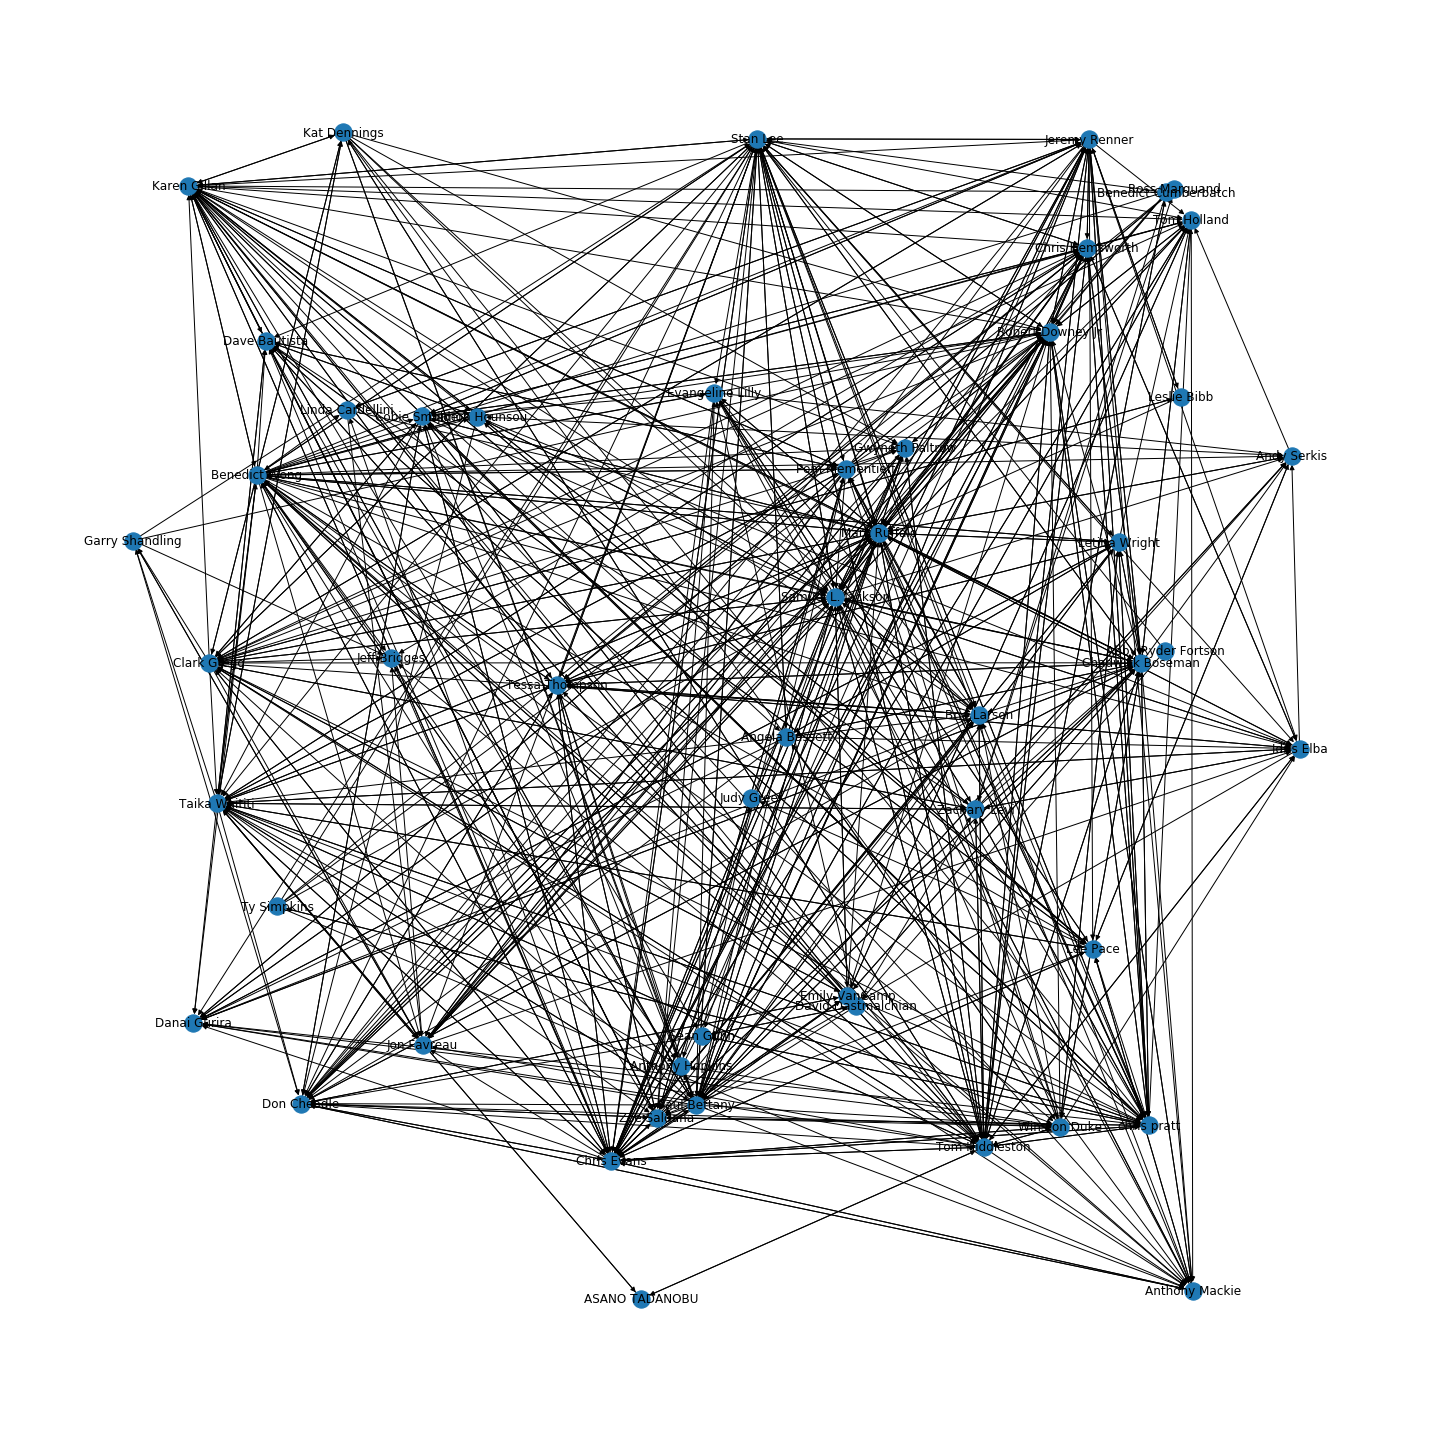

In [120]:
plt.figure(figsize=(20,20))
# Layout
pos=nx.random_layout(Graph)
#Drawing in plt using nx
nx.draw_networkx(Graph, pos, with_labes=True)
plt.axis('off')
plt.tight_layout()
#plt.savefig('network.png')